### Description
This notebook explores variability and quanity of pH data across time in order to create reasonable time bins to spatially interpolate within.

In [1]:
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

In [2]:
# Read the data and parse the PROF_DATE_TIME_LOCAL column to a datetime object
data = pd.read_csv('../data/concat/MWRA_TA_DIC_2017_to_2022.csv',
index_col='PROF_DATE_TIME_LOCAL', parse_dates=True)
date_form = DateFormatter("%m/%y")

In [24]:
f22 = 'F22'

f22 = data[(data['STAT_ID'] == f22)
& (data['pH ()'].notnull())
& (data['VAL_QUAL'].isnull())
& (data['SAMPLE_DEPTH_CODE'] == 'A')]

all = data[(data['pH ()'].notnull())
& (data['VAL_QUAL'].isnull())
& (data['SAMPLE_DEPTH_CODE'] == 'A')]

In [11]:
#shallow = f22[f22['SAMPLE_DEPTH_CODE'] == 'A']
#deep = f22[f22['SAMPLE_DEPTH_CODE'] == 'E']

fig = plt.figure() 
fig.set_size_inches(15, 15)

# Plot the shallow and deep data
all.plot(x='PROF_DATE_TIME_LOCAL', y='pH ()', label='Shallow', kind = 'scatter')
plt.gca().xaxis.set_major_formatter(date_form)

#print(len(f22[f22['SAMPLE_DEPTH_CODE'] == 'E']))

NameError: name 'reliance' is not defined

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


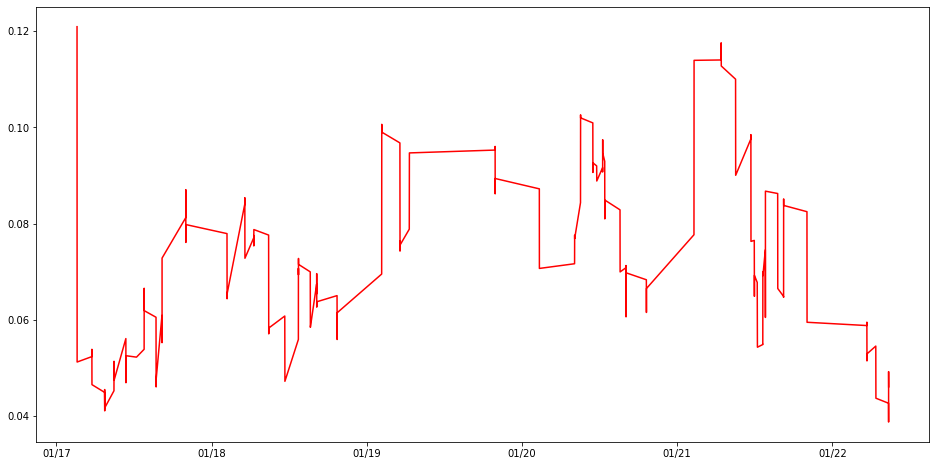

In [34]:
pH = all['pH ()'].to_frame()
# Standard deviation of the pH values
pH['EWMA30'] = pH['pH ()'].ewm(span=40).std()

fig = plt.figure()
# Set the fig size
fig.set_size_inches(16, 8)

# Blue circles
#plt.scatter(pH.index, pH['pH ()'], color = 'blue', label='pH ()')
plt.plot(pH.index, pH['EWMA30'], color  = 'red', label='EWMA30')
plt.gca().xaxis.set_major_formatter(date_form)

In [20]:
data = pd.read_csv('../data/concat/MWRA_TA_DIC_2017_to_2022.csv', parse_dates=['PROF_DATE_TIME_LOCAL'])

In [21]:
pH = data[(data['pH ()'].notnull()) & (data['VAL_QUAL'].isnull()) & (data['SAMPLE_DEPTH_CODE'] == 'A')]

In [22]:
# Convert the PROF_DATE_TIME_LOCAL column to datetimes
pH['PROF_DATE_TIME_LOCAL'] = pd.to_datetime(pH['PROF_DATE_TIME_LOCAL'])

<ipython-input-22-b768c611c972>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pH['PROF_DATE_TIME_LOCAL'] = pd.to_datetime(pH['PROF_DATE_TIME_LOCAL'])


In [23]:
pH['MONTH_BIN'] = [date.dt.month + '/' + date.dt.year for date in pH['PROF_DATE_TIME_LOCAL']]

AttributeError: 'Timestamp' object has no attribute 'dt'

In [7]:
pH.columns

Index(['STUDY_ID', 'EVENT_ID', 'STAT_ID', 'ORDERED_DEPTH_CODE', 'SAMPLE_ID',
       'SAMPLE_DEPTH_TOP', 'SAMPLE_DEPTH_BOTTOM', 'LATITUDE', 'LONGITUDE',
       'VAL_QUAL', 'Data Source', 'SAMPLE_DEPTH_CODE', 'DEPTH (m)',
       'CONDTVY (mS/cm)', 'DISS_OXYGEN (mg/L)', 'FLUORESCENCE (ug/L)',
       'FLU_RAW (ug/L)', 'PCT_SAT (PCT)', 'pH ()', 'SAL (PSU)', 'SIGMA_T ()',
       'TEMP (C)', 'TRANS (m-1)', 'Station_D', 'Air Irradiance',
       'Water Irradiance', 'TA in (mmol/kgSW)', 'TCO2 in (mmol/kgSW)',
       't(oC) out', 'P (dbars) out', 'pH out', 'fCO2 out (matm)',
       'pCO2 out (matm)', 'HCO3 out (mmol/kgSW)', 'CO3 out (mmol/kgSW)',
       'CO2 out (mmol/kgSW)', 'B Alk out (mmol/kgSW)', 'OH out (mmol/kgSW)',
       'P Alk out (mmol/kgSW)', 'Si Alk out (mmol/kgSW) ', 'Revelle out',
       'WCa out', 'WAr out', 'xCO2 out (dry at 1 atm) (ppm)',
       'Field Replicate', 'VINDTA Sample Name', 'Sampled Bottle Name',
       'Sampling Date', 'Sampling Depth', 'Salinity - Carolina',
       